In [126]:
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import statistics 
from statistics import mode 
import math
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report


In [2]:
# importing the dataset
data = pd.read_csv("C:\\Users\\or.hirshman\\Documents\\learning\\DS_Projects\\\Implementations\\KNN_implementation\\diabetes_data.csv")
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Describe data
data.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Check for Nulls
data.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [11]:
# Group by gender
genders = data.groupby('diabetes')
for gender,rows in genders:
    display(gender,rows)

0

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


1

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


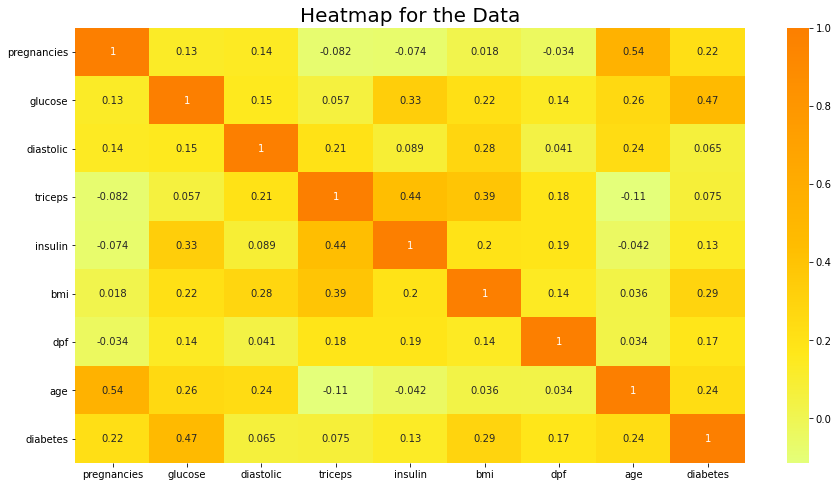

In [13]:
# Heatmap
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [105]:
X = data.drop(columns=['diabetes'])
y = data['diabetes'].values

In [106]:
# Scale X
X_scaled = scale(X)
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [203]:
# Implement KNN
def KNN_implementation(X_train, X_test, y_train , k, isBinaryY):
    
    neighbors_dict = {}
    for index_test in range(len(X_test)):
        row1 = X_test[index_test]
        for index_train in range(len(X_train)):
            row2 = X_train[index_train]
            distance = euclidean_distance(row1, row2)
            if index_test not in neighbors_dict:
                neighbors_dict[index_test] = [(distance, y_train[index_train])]
            elif len(neighbors_dict[index_test]) < k:
                neighbors_dict[index_test].append((distance, y_train[index_train]))
            else:
                max_dist = max(neighbors_dict[index_test])
                if distance < max_dist[0]:
                    neighbors_dict[index_test].remove(max_dist)
                    neighbors_dict[index_test].append((distance, y_train[index_train]))
                            
    y_predicted = [] 
    for index_test in range(len(X_test)):
        y_votes = get_second_items_from_tuples(neighbors_dict[index_test])
        if(isBinaryY):
            y_predicted.append(mode(y_votes))
        else:
            y_predicted.append(mean(y_votes))
    
    return y_predicted

In [169]:
# For a list of tuples return a list of the second elements of each tuple
def get_second_items_from_tuples(tuples_list):
    return [(sub[1]) for sub in tuples_list] 

In [196]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)

In [209]:
# Use my KNN implementation on data
res = KNN_implementation(X_scaled_train, X_scaled_test, y_train , 5, true)
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.66      0.59      0.62        74

    accuracy                           0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.77      0.77      0.77       231



In [210]:
# Run sklearn KNN in order to compare to implementation

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_scaled_train, y_train)

print('k-NN score for training set: %f' % knn.score(X_scaled_train, y_train))
print('k-NN score for test set: %f' % knn.score(X_scaled_test, y_test))

y_true, y_pred = y_test, knn.predict(X_scaled_test)

print(classification_report(y_true, y_pred))

k-NN score for training set: 0.795158
k-NN score for test set: 0.770563
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.66      0.59      0.62        74

    accuracy                           0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.77      0.77      0.77       231



In [ ]:
# The same result!